In [9]:
# Building a Regression Model

# 1. Download the dataset: Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from scipy import stats

In [10]:
# 2. Load the dataset into the tool.
df = pd.read_csv('Housing.csv')
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')


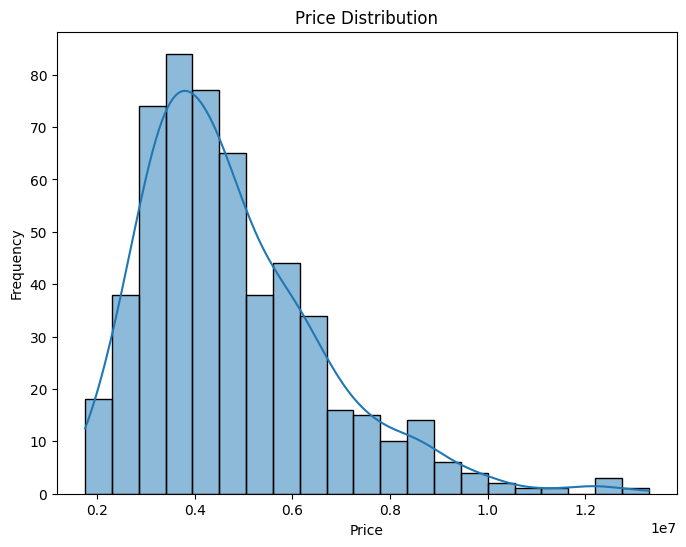

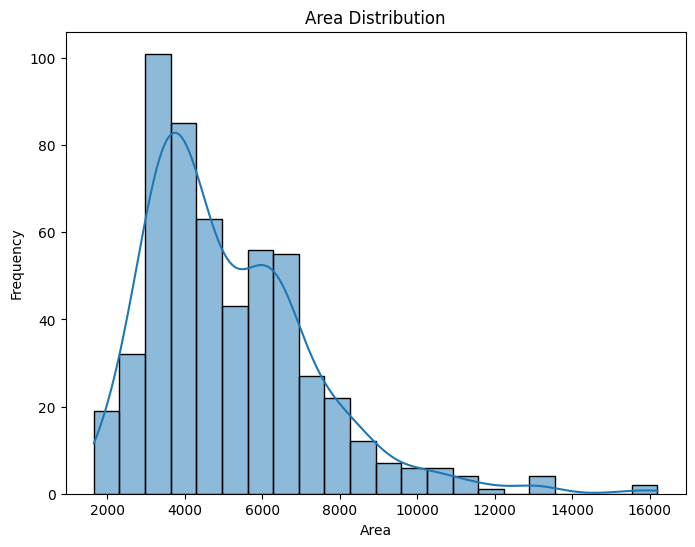

In [11]:
# 3. Perform Univariate Analysis
# Price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Area
plt.figure(figsize=(8, 6))
sns.histplot(df['area'], kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

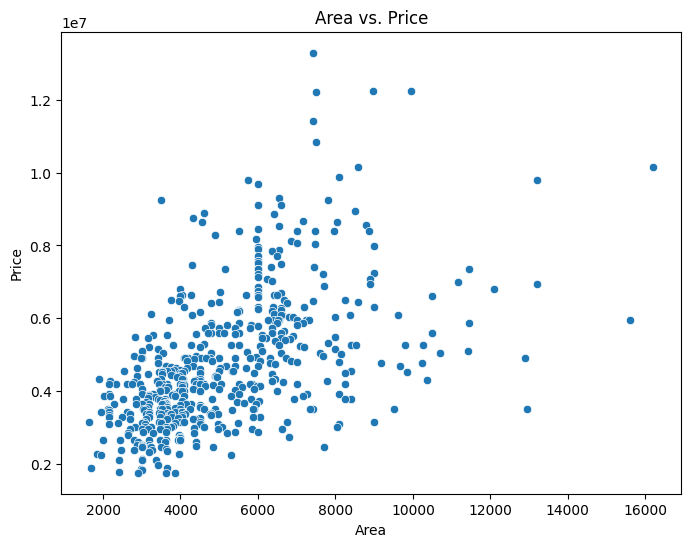

In [12]:
# 4. Perform Bi-Variate Analysis
# Area vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<ipython-input-13-a488011768c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


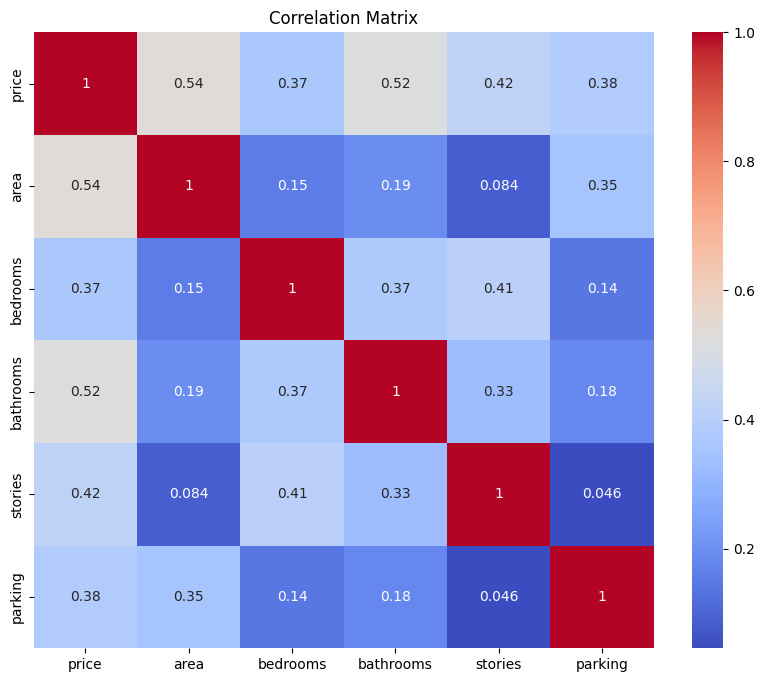

In [13]:
# 5. Perform Multi-Variate Analysis
# Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# 6. Perform descriptive statistics on the dataset.
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [15]:
# 7. Check for Missing values and deal with them.
print(df.isnull().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [36]:
# 8. Find the outliers and replace them
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
numeric_data = df_imputed[numeric_cols]
z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_imputed.loc[outliers, numeric_cols] = df_imputed[numeric_cols].median()

In [28]:
# 9. Check for Categorical columns and perform encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for col in categorical_cols:
    df_imputed[col] = LabelEncoder().fit_transform(df_imputed[col])

print(df_imputed[categorical_cols])

     mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0           1          0         0                0                1   
1           1          0         0                0                1   
2           1          0         1                0                0   
3           1          0         1                0                1   
4           1          1         1                0                1   
..        ...        ...       ...              ...              ...   
540         1          0         1                0                0   
541         0          0         0                0                0   
542         1          0         0                0                0   
543         0          0         0                0                0   
544         1          0         0                0                0   

     furnishingstatus  
0                   0  
1                   0  
2                   1  
3                   0  
4              

In [29]:
# 10. Split the data into dependent and independent variables
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']

print(X)
print(y)

     area bedrooms bathrooms stories  mainroad  guestroom  basement  \
0    7420        4         2       3         1          0         0   
1     NaN      NaN       NaN     NaN         1          0         0   
2    9960        3         2       2         1          0         1   
3    7500        4         2       2         1          0         1   
4    7420        4         1       2         1          1         1   
..    ...      ...       ...     ...       ...        ...       ...   
540  3000        2         1       1         1          0         1   
541  2400        3         1       1         0          0         0   
542  3620        2         1       1         1          0         0   
543  2910        3         1       1         0          0         0   
544  3850        3         1       2         1          0         0   

     hotwaterheating  airconditioning parking  furnishingstatus  
0                  0                1       2                 0  
1              

In [30]:
# 11. Scale the independent variables
pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler()
)

X_preprocessed = pipeline.fit_transform(X)

In [31]:
# 12. Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [32]:
# 13. Build the Model
model = LinearRegression()

In [33]:
# 14. Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# 15. Test the Model
y_pred = model.predict(X_test)

In [35]:
# 16. Measure the performance using Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2344336789781.0747
R-squared: 0.5361946366321746
